In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import photRM # credits Dr Anđelka Kovačević & Isidora Jankov (https://github.com/LSST-sersag/dle)
from rm_utils import ZDCF, load_results_ZDCF, PLIKE # functions to wrap fortran programs
%load_ext autoreload
import glob

In [27]:
%autoreload

In [72]:
os.chdir(FORTRAN_DIR)

In [ ]:
#make this more streamline? 

In [35]:
fortran_dir = 'fortran_dir'

In [73]:
obj_name = '092332.21+081337.8'
r,g = glob.glob(f'{obj_name}_*')

In [75]:
ZDCF(g,g,f'ccf_gg_{obj_name}', acf=True, uniform=False)

ZDCF V2.2 begins:
Auto-correlation or cross-correlation? (1/2):
Enter output files prefix:
Uniform sampling of light curve? (y/n):
Enter minimal number of points per bin (0 for default):
Omit zero-lag points? (y/n):
How many Monte Carlo runs for error estimation?

ZDCF PARAMETERS:
Autocorrelation?  T
Uniform sampling? F
Omit zero lags?   T
Minimal # in bin:         11
# of Monte Carlo:      10000
Monte Carlo seed:     123456
Enter name of 1st light curve file:

 ccf_gg_092332.21+081337.8.lc1  written (contains          876  points) ...
 ccf_gg_092332.21+081337.8.lc2  written (contains          876  points) ...

Binning with minimum of  11 points per bin and resolution of 1.00E-03 .

       866 bins actually used,         45 inter-dependent pairs discarded.

  tau       -sig(tau)  +sig(tau)   dcf        -err(dcf)  +err(dcf) (#bin)

  2.139E+00  3.595E-05  8.612E-05  5.830E-01  2.256E-02  2.212E-02 ( 875)
  4.279E+00  7.181E-05  5.026E-05  3.813E-01  2.913E-02  2.876E-02 ( 874)
  6.418E+

In [76]:
ZDCF(g,r,f'ccf_gr_{obj_name}', uniform=False)

02 ( 506)
  7.937E+02  1.810E-05  4.293E-05 -1.151E-02  4.459E-02  4.461E-02 ( 505)
  7.959E+02  5.410E-05  3.745E-05 -1.316E-03  4.465E-02  4.465E-02 ( 504)
  7.980E+02  2.897E-05  3.206E-05 -3.693E-02  4.459E-02  4.467E-02 ( 503)
  8.002E+02  3.438E-05  5.717E-05 -7.890E-02  4.438E-02  4.454E-02 ( 502)
  8.023E+02  3.981E-05  2.123E-05 -1.207E-01  4.401E-02  4.425E-02 ( 501)
  8.044E+02  2.225E-05  4.642E-05 -1.667E-01  4.342E-02  4.374E-02 ( 500)
  8.066E+02  5.049E-05  2.581E-05 -2.044E-01  4.280E-02  4.319E-02 ( 499)
  8.087E+02  2.546E-05  3.557E-05 -2.092E-01  4.275E-02  4.315E-02 ( 498)
  8.108E+02  3.098E-05  6.057E-05 -1.675E-01  4.354E-02  4.387E-02 ( 497)
  8.130E+02  3.627E-05  2.476E-05 -1.395E-01  4.399E-02  4.427E-02 ( 496)
  8.151E+02  2.645E-05  4.984E-05 -1.398E-01  4.403E-02  4.431E-02 ( 495)
  8.173E+02  4.717E-05  2.150E-05 -6.263E-02  4.486E-02  4.499E-02 ( 494)
  8.194E+02  2.201E-05  3.903E-05 -6.416E-02  4.489E-02  4.502E-02 ( 493)
  8.215E+02  5.790E-05  3.36

0  4.614E-01  2.685E-02  2.643E-02 ( 875)
  6.418E+00  4.667E-05  2.139E+00  3.041E-01  3.091E-02  3.060E-02 ( 873)
  1.070E+01  5.754E-05  2.139E+00  2.042E-01  3.263E-02  3.240E-02 ( 871)
  1.498E+01  7.270E-06  2.139E+00  1.985E-01  3.274E-02  3.252E-02 ( 869)
  1.925E+01  1.806E-05  2.139E+00  1.982E-01  3.278E-02  3.256E-02 ( 867)
  2.353E+01  2.887E-05  2.139E+00  2.756E-01  3.161E-02  3.131E-02 ( 865)
  2.781E+01  3.957E-05  2.139E+00  3.750E-01  2.948E-02  2.910E-02 ( 863)
  3.209E+01  5.043E-05  2.139E+00  3.010E-01  3.119E-02  3.087E-02 ( 861)
  3.637E+01  1.385E-07  2.139E+00  1.955E-01  3.297E-02  3.275E-02 ( 859)
  4.065E+01  7.195E-05  2.139E+00  1.381E-01  3.363E-02  3.347E-02 ( 857)
  4.493E+01  2.171E-05  2.139E+00  1.130E-01  3.387E-02  3.374E-02 ( 855)
  4.921E+01  3.253E-05  2.139E+00  1.681E-01  3.341E-02  3.322E-02 ( 853)
  5.349E+01  4.337E-05  2.139E+00  2.202E-01  3.279E-02  3.254E-02 ( 851)
  5.776E+01  5.410E-05  2.139E+00  2.814E-01  3.180E-02  3.149E-02 ( 8

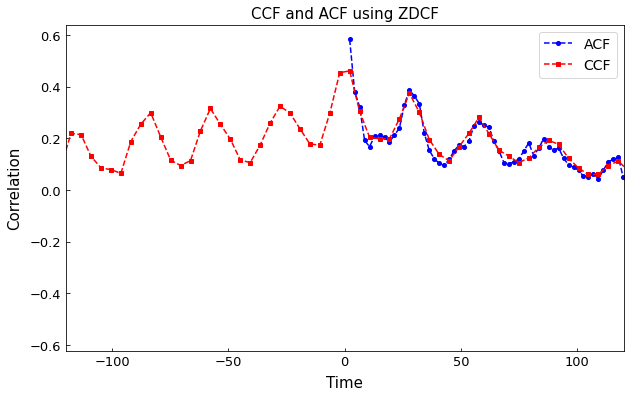

In [77]:
acf, ccf_gr = load_results_ZDCF(f'ccf_gg_{obj_name}.dcf', f'ccf_gr_{obj_name}.dcf', plot=True)

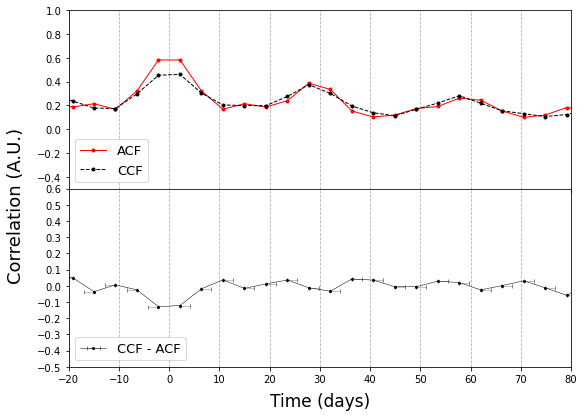

In [78]:
# since ZDCF does not provide the ACF on the negative tau axis, we need to add it:
acf_total = photRM.add_inverted_acf(acf)
# We still need to make CCF and ACF the same length so we could subtract them.
# We do this by interpolating one of those functions to the time grid of the other.
acf_interp_gr = photRM.interp(ccf_gr, acf_total) # first param is the function having the x-axis on which we want to interpolate the other function.
# Subtracting CCF and ACF
final_ccf_gr = photRM.delta_ccf(acf_interp_gr, ccf_gr)
final_ccf_gr.to_csv(os.path.join(fortran_dir,f'plike_gr_{obj_name}.dcf'), sep=" ", index=False, header=False)
final_ccf_gr.tail()
photRM.plot_ccf_acf(final_ccf_gr, ccf_gr, acf_interp_gr, locator=10)

In [99]:
PLIKE(f'plike_gr_{obj_name}.dcf', 5,10)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  5.000E+00 to  1.000E+01

   1 data points found in time-lag range

 COM: Problems. np =            1  imax =            1  rmax =   -1.8527712916587211E-002  i1 =            1  i2 =            1  sumr =   -1.85277127E-02
      6.418     -0.019


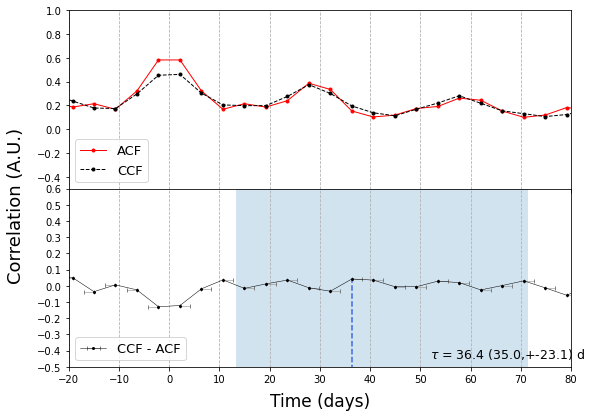

In [80]:
#+3.637E+01  +3.501E+01  -2.309E+01
tau = 36.37
err_low = 35.01
err_high = -23.09
photRM.plot_ccf_acf(final_ccf_gr, ccf_gr, acf_interp_gr, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

In [88]:
df_g = pd.read_csv(g, header=None, sep=' ')
df_r = pd.read_csv(r, header=None, sep=' ')

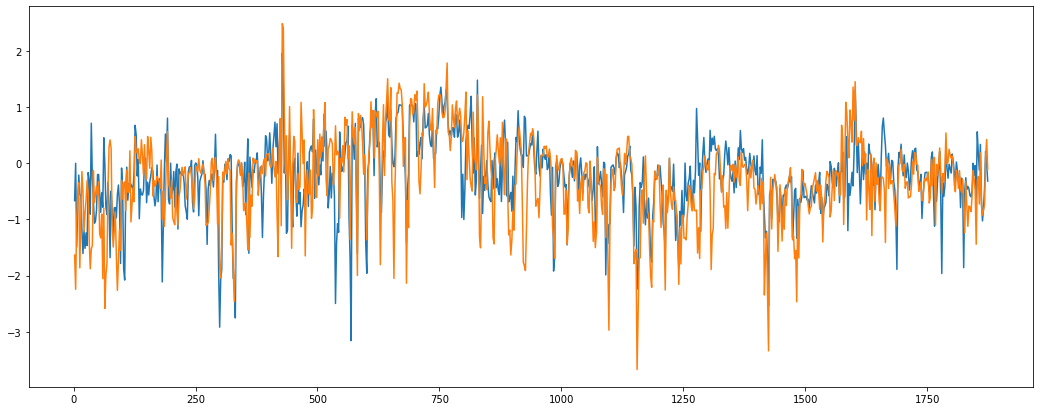

In [101]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()

plt.plot(df_g[0], df_g[1])
plt.plot(df_r[0], df_r[1])

In [ ]:
import 